# Importing Libraries


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tomato-reviews/zomato.csv


# Reading Dataset

In [2]:
zmt = pd.read_csv('/kaggle/input/tomato-reviews/zomato.csv')

In [3]:
zmt.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# Droping unnecessary column

In [5]:
zmt.drop(['url', 'reviews_list', 'menu_item', 'address', 'phone', 'dish_liked'], axis=1, inplace=True)

In [6]:
zmt.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari


In [7]:
print(zmt.duplicated().value_counts())

False    51609
True       108
Name: count, dtype: int64


# Renaming Columns

In [8]:
zmt.rename(columns={'name':'restaurants', 'rate': 'rating', 'cuisines':'food_type','listed_in(type)':'type', 'listed_in(city)':'city', 'approx_cost(for two people)':'cost'}, inplace=True)

In [9]:
zmt.head(2)

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari


# Dropping NaN values

In [10]:
zmt.isnull().sum()

restaurants        0
online_order       0
book_table         0
rating          7775
votes              0
location          21
rest_type        227
food_type         45
cost             346
type               0
city               0
dtype: int64

In [11]:
zmt.dropna(inplace=True)

# Cleaning Individual Columns

**Columns : Restaurant**

In [12]:
zmt.groupby('restaurants').count().head()

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
restaurants,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3,3,3,3,3,3,3,3,3,3


In [13]:
zmt['restaurants']=zmt['restaurants'].str.replace('[Ãx][^A-Za-z]+', '', regex=True)

In [14]:
zmt.groupby('restaurants').count().head()

,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
restaurants,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6
100C,3,3,3,3,3,3,3,3,3,3


In [15]:
zmt['restaurants']=zmt['restaurants'].str.replace('Caf-|Caf', 'Cafe', regex=True)

**Column : 'online_order'**

In [16]:
zmt['online_order'].unique()

array(['Yes', 'No'], dtype=object)

**Column :'book_table'**

In [17]:
zmt['book_table'].unique()

array(['Yes', 'No'], dtype=object)

**Column : 'rating'**

In [18]:
zmt['rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
replace= lambda x:x.replace('/5','')
l=[]
for val in map (replace, zmt['rating']):
    if val!= 'NEW' and val!='-':
        var=float(val)
    l.append(var)
zmt['rating']=l

In [20]:
zmt['rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [21]:
zmt['rating'].dtype

dtype('float64')

**Column :'votes'**

In [22]:
zmt['votes'].isnull().value_counts()

votes
False    43533
Name: count, dtype: int64

**column :'location'**

In [23]:
zmt['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

**Cloumn :'rest_type' and 'food_type'**

In [24]:
zmt['rest_type'].unique(),zmt.rest_type.isnull().value_counts()

(array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
        'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
        'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
        'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
        'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
        'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
        'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
        'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
        'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
        'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
        'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
        'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
        'Quick Bites, Sweet Shop', 'Microbrewery',
        'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
        'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
        'Dessert Parlor, Quick Bites

In [25]:
zmt.food_type.unique(), zmt.food_type.isnull().value_counts()

(array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
        'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
        'North Indian, Street Food, Biryani',
        'North Indian, Chinese, Arabian, Momos'], dtype=object),
 food_type
 False    43533
 Name: count, dtype: int64)

**Column :'cost'**

In [26]:
zmt['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [27]:
zmt.cost = zmt.cost.apply(lambda x:x.replace(",","")).astype(int)

In [28]:
zmt.cost.unique(),zmt.cost.dtype

(array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
         750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
         199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
        2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
          40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
         360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500]),
 dtype('int64'))

**Column :'type'**

In [29]:
zmt.type.unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

**Column: 'city'**

In [30]:
zmt.city.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

# Droping Duplicates

In [31]:
print(zmt.duplicated().value_counts())

False    43453
True        80
Name: count, dtype: int64


In [32]:
zmt.drop_duplicates(keep='last',inplace=True)

In [33]:
print(zmt.duplicated().value_counts())

False    43453
Name: count, dtype: int64


In [34]:
zmt

,restaurants,online_order,book_table,rating,votes,location,rest_type,food_type,cost,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafee,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
51709,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
51711,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars,Whitefield
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars,Whitefield


In [35]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43453 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   restaurants   43453 non-null  object 
 1   online_order  43453 non-null  object 
 2   book_table    43453 non-null  object 
 3   rating        43453 non-null  float64
 4   votes         43453 non-null  int64  
 5   location      43453 non-null  object 
 6   rest_type     43453 non-null  object 
 7   food_type     43453 non-null  object 
 8   cost          43453 non-null  int64  
 9   type          43453 non-null  object 
 10  city          43453 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 4.0+ MB


In [36]:
zmt.to_csv('./zomato_clean_data.csv')

# Data visulaization

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# restaurants accepting online orders for zomato

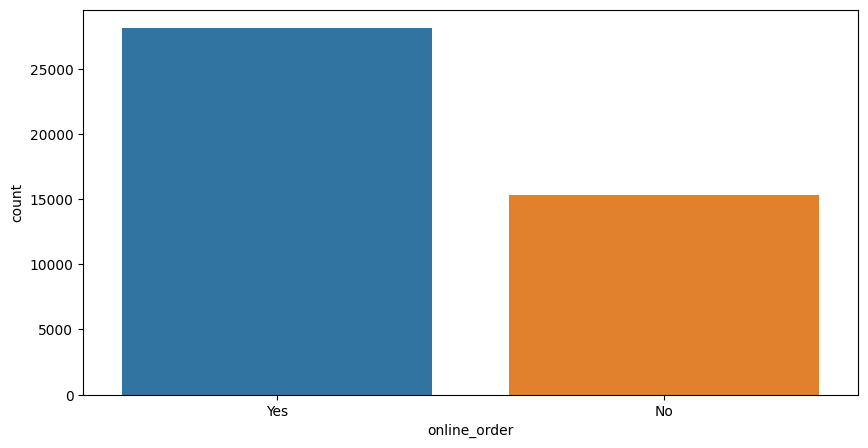

In [39]:
plt.figure(figsize =(10,5))
sns.countplot(x='online_order',data=zmt)
plt.show()

In [40]:
#Find the best location by seeing the dataset.

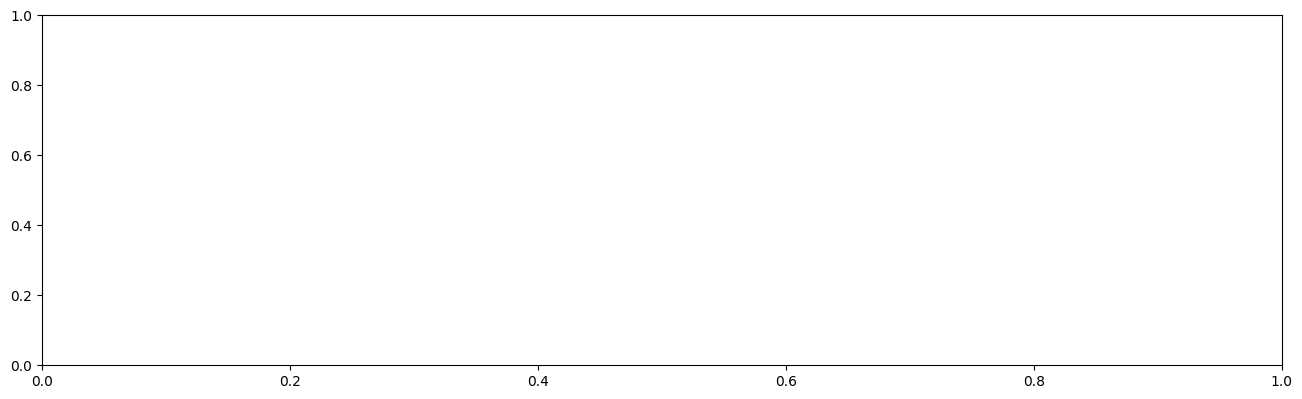

In [41]:
plt.figure(figsize=(16,10))
ax=plt.subplot(2,1,1)

<Axes: xlabel='location', ylabel='votes'>

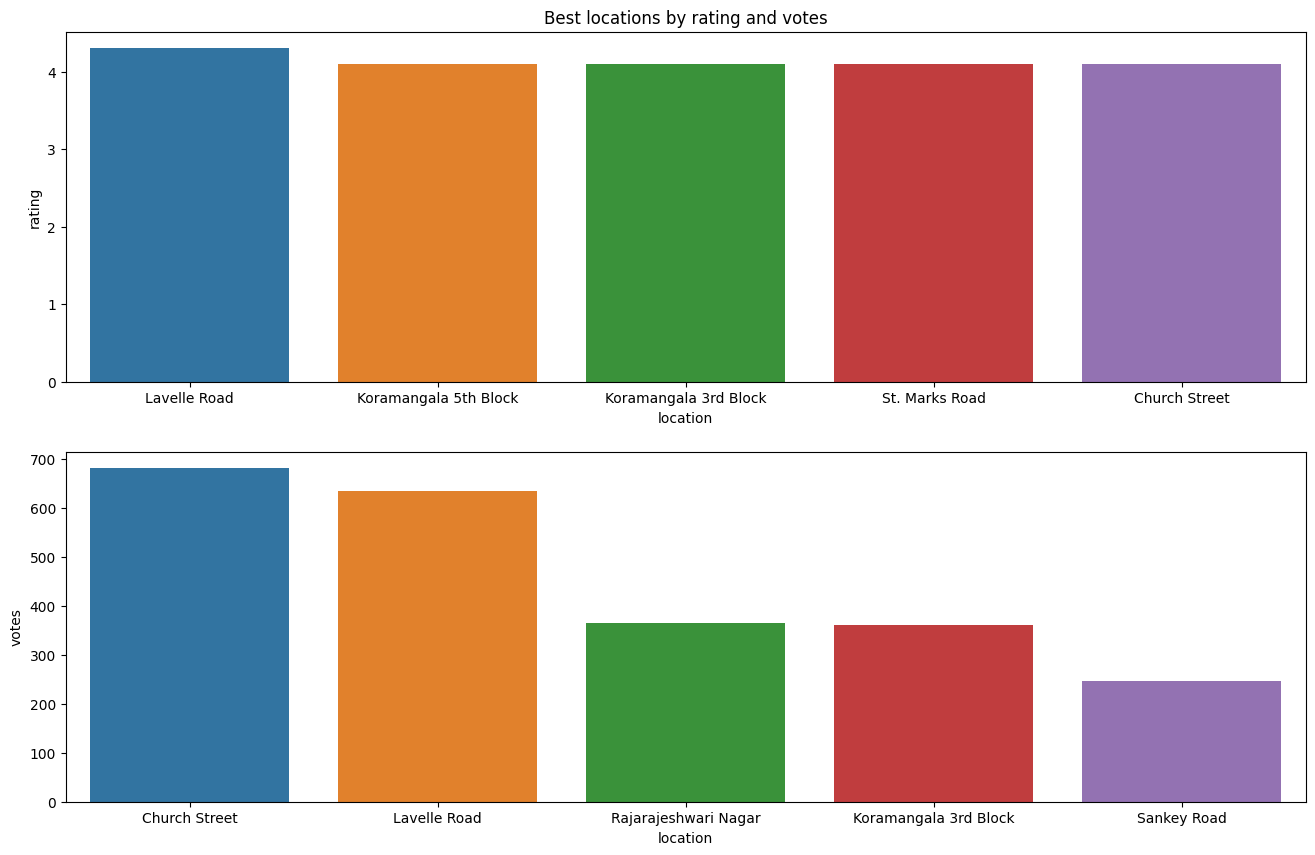

In [42]:
plt.figure(figsize=(16,10))
ax= plt.subplot(2,1,1)
loc_rating=zmt.groupby('location').agg({'rating':'median'})
rating_sorted_loc=loc_rating.sort_values('rating',ascending=False).head(5).reset_index()
sns.barplot(x='location',y='rating', data=rating_sorted_loc)
ax.set_title("Best locations by rating and votes")
ax= plt.subplot(2,1,2)
loc_votes=zmt.groupby('location').agg({'votes':'median'})
votes_sorted_loc=loc_votes.sort_values('votes',ascending=False).head(5).reset_index()
sns.barplot(x='location',y='votes', data=votes_sorted_loc)

In [43]:
rating_sorted_loc

,location,rating
0,Lavelle Road,4.3
1,Koramangala 5th Block,4.1
2,Koramangala 3rd Block,4.1
3,St. Marks Road,4.1
4,Church Street,4.1
